## EN2550: Assignment 03 on Object Counting on a Conveyor Belt

### Connected Component Analysis

#### Loading Images

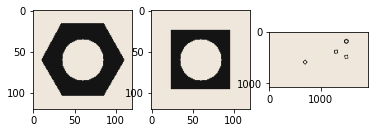

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

#### Otsu's Thresholding

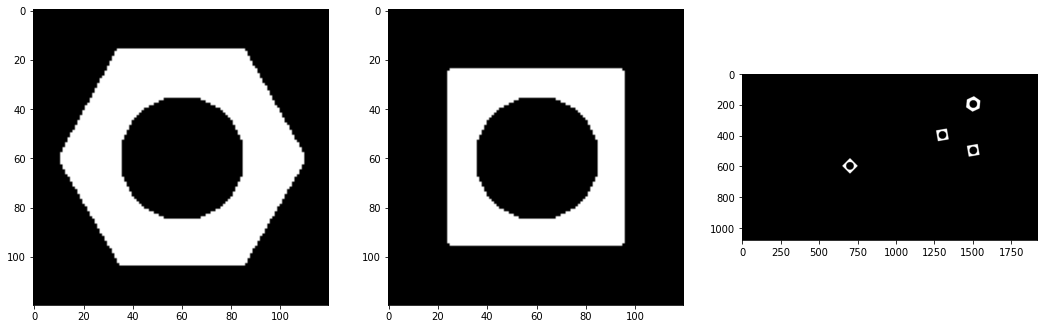

In [2]:
hexnut_template_gray = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
hexnut_template_blur = cv.GaussianBlur(hexnut_template_gray,(5,5),0)
ret3,hexnut_template_th = cv.threshold(hexnut_template_blur,0,255,cv.THRESH_BINARY_INV +cv.THRESH_OTSU)

squarenut_template_gray = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
squarenut_template_blur = cv.GaussianBlur(squarenut_template_gray,(5,5),0)
ret3,squarenut_template_th = cv.threshold(squarenut_template_blur,0,255,cv.THRESH_BINARY_INV +cv.THRESH_OTSU)

conveyor_f100_gray = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)
conveyor_f100_blur = cv.GaussianBlur(conveyor_f100_gray,(5,5),0)
ret3,conveyor_f100_th = cv.threshold(conveyor_f100_blur,0,255,cv.THRESH_BINARY_INV +cv.THRESH_OTSU)

fig, ax = plt. subplots(1,3, figsize = (18,6))
ax[0].imshow(hexnut_template_th, 'gray')
ax[1].imshow(squarenut_template_th, 'gray')
ax[2].imshow(conveyor_f100_th, 'gray')
plt.show()

#### Morphological Closing

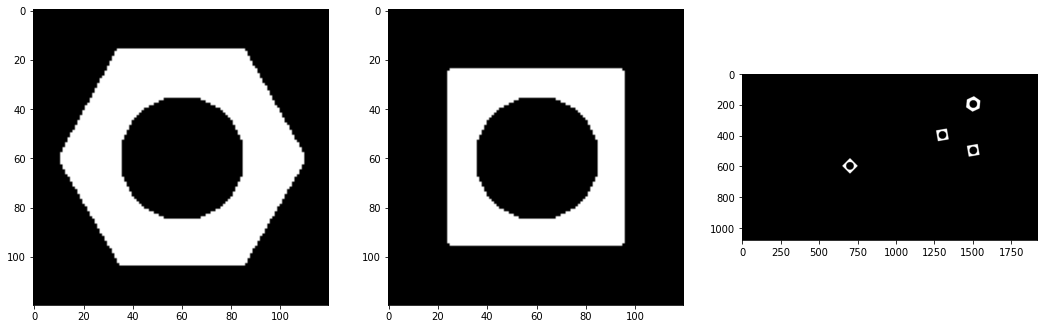

In [3]:
kernel = np.ones((3,3),np.uint8)

hexnut_template_closed = cv.morphologyEx(hexnut_template_th, cv.MORPH_CLOSE, kernel)
squarenut_template_closed = cv.morphologyEx(squarenut_template_th, cv.MORPH_CLOSE, kernel)
conveyor_f100_closed = cv.morphologyEx(conveyor_f100_th, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(1,3, figsize = (18,6))
ax[0].imshow(hexnut_template_closed, 'gray')
ax[1].imshow(squarenut_template_closed, 'gray')
ax[2].imshow(conveyor_f100_closed, 'gray')
plt.show()

#### Connected Component Analysis

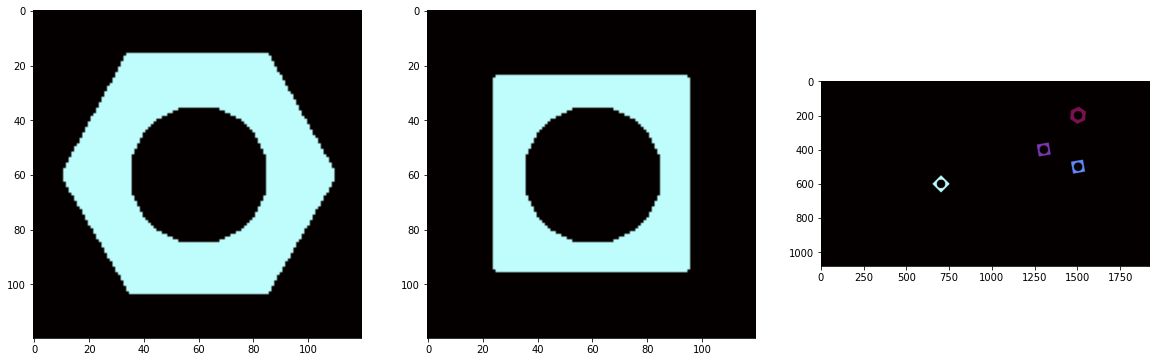

In [42]:
connectivity = 8
num_labels1, labelmap1, stats1, centroids1 = cv.connectedComponentsWithStats(hexnut_template_closed, connectivity)
colormapped1 = cv.applyColorMap((labelmap1/np.amax(labelmap1)*255).astype('uint8'), cv.COLORMAP_MAGMA)

num_labels2, labelmap2, stats2, centroids2 = cv.connectedComponentsWithStats(squarenut_template_closed, connectivity)
colormapped2 = cv.applyColorMap((labelmap2/np.amax(labelmap2)*255).astype('uint8'), cv.COLORMAP_MAGMA)

num_labels3, labelmap3, stats3, centroids3 = cv.connectedComponentsWithStats(conveyor_f100_closed, connectivity)
colormapped3 = cv.applyColorMap((labelmap3/np.amax(labelmap3)*255).astype('uint8'), cv.COLORMAP_MAGMA)

fig, ax = plt. subplots(1,3, figsize=(20, 20))
ax[0].imshow(colormapped1)
ax[1].imshow(colormapped2)
ax[2].imshow(colormapped3)
plt.show()

In [45]:
print(num_labels3)
print(stats3)
print(centroids3)
print(centroids3.shape)

5
[[      0       0    1920    1080 2059658]
 [   1454     150      92     100    4636]
 [   1259     359      82      82    3083]
 [   1459     459      82      82    3083]
 [    651     551      99      99    3140]]
[[ 957.36445274  540.44392516]
 [1499.24201898  199.28515962]
 [1299.18261434  399.18261434]
 [1499.18261434  499.18261434]
 [ 700.          600.        ]]
(5, 2)


#### Extreme Contours

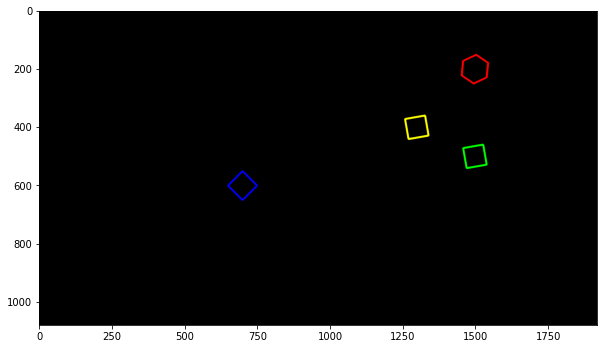

In [6]:
contours, hierarchy = cv.findContours(conveyor_f100_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
plot_image = np.zeros_like(conveyor_f100)
cv.drawContours(plot_image, contours, 0, (0,0,255), 5)
cv.drawContours(plot_image, contours, 1, (0,255,0), 5)
cv.drawContours(plot_image, contours, 2, (255,255,0), 5)
cv.drawContours(plot_image, contours, 3, (255,0,0), 5)
fig, ax = plt. subplots(1,1, figsize=(10, 10))
ax.imshow(plot_image,'gray')
plt.show()

### Detecting Objects on a Synthetic Conveyor

In [10]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

#### Number of Matching Hexagonal and Square Nuts 

In [6]:

hexcontours, hexhierarchy = cv.findContours(hexnut_template_closed, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
squarecontours, squarehierarchy = cv.findContours(squarenut_template_closed, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv.findContours(conveyor_f100_closed, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

count1 = 0
count2 = 0
for contour in contours:
    diff1 = cv.matchShapes(hexcontours[0], contour, 1, 0.0)
    diff2 = cv.matchShapes(squarecontours[0], contour, 1, 0.0)
    if diff1 < 0.001:
        count1 += 1
    elif diff2 < 0.001:
        count2 += 1
print('Number of Hexagonal nuts = ', count1)
print('Number of square nuts = ', count2)

Number of Hexagonal nuts =  1
Number of square nuts =  3


#### Finding the Number of Hexagonal and Squarenuts in a Frame of a Video

In [47]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
hexcontours, hexhierarchy = cv.findContours(hexnut_template_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
squarecontours, squarehierarchy = cv.findContours(squarenut_template_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
f = 0
frame_array = []
centroid_list = []
hexagonal_total = 0
square_total = 0 
max_distance = 0
previous_max_distance = 0

while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    frame_hex_count = 0
    frame_square_count = 0
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frame_blur = cv.GaussianBlur(frame_gray,(5,5),0)
    ret3,frame_th = cv.threshold(frame_blur,0,255,cv.THRESH_BINARY_INV +cv.THRESH_OTSU)
    kernel = np.ones((3,3),np.uint8)
    frame_closed = cv.morphologyEx(frame_th, cv.MORPH_CLOSE, kernel)
    connectivity = 8
    num_labels, labelmap, stats, centroids = cv.connectedComponentsWithStats(conveyor_f100_closed, connectivity)
    frame_contours, frame_hierarchy = cv.findContours(frame_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    for contour in frame_contours:
        diff1 = cv.matchShapes(hexcontours[0], contour, 1, 0.0)
        diff2 = cv.matchShapes(squarecontours[0], contour, 1, 0.0)
        if diff1 < 0.001:
            frame_hex_count += 1
            
        elif diff2 < 0.001:
            frame_square_count += 1
    
    if num_labels > 1:
        max_distance = np.floor(np.max(centroids[1:, 0][centroids[1:, 0] <= 1875]))
        indexes = np.where(np.floor(centroids[1:, 0]) == max_distance)
        if max_distance >= previous_max_distance:
            previous_max_distance = max_distance
            for index in indexes[0]:
                area = stats[int(index)+1, 4]
                if 5000 > area > 4000: hexagonal_total += 1
                if 4000 > area > 3000: square_total += 1
                print(area) 
            print(indexes[0])
            print(centroids[1:, 0])
            print(max_distance)

    f += 1
    frame_text = 'Frame:' + str(f)
    hex_text = 'Number of Hexagonal nuts in the current frame:' + str(frame_hex_count)
    square_text = 'Number of Square nuts in the current frame:' + str(frame_square_count)
    total_hex_text = 'Total number of Hexagonal nuts:' + str(hexagonal_total)
    total_square_text = 'Total number of Square nuts:' + str(square_total)
    cv.putText(frame,frame_text , (100, 50), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(frame,hex_text , (100, 80), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(frame,square_text , (100, 110), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(frame,total_hex_text , (100, 140), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(frame,total_square_text , (100, 170), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)
    frame_array.append(frame)
    
    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()
shape = (1080, 1920, 3)
out = cv.VideoWriter('./conveyor_result_190621M.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    #cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

4636
3083
[0 2]
[1499.24201898 1299.18261434 1499.18261434  700.        ]
1499.0
4636
3083
[0 2]
[1499.24201898 1299.18261434 1499.18261434  700.        ]
1499.0
4636
3083
[0 2]
[1499.24201898 1299.18261434 1499.18261434  700.        ]
1499.0
4636
3083
[0 2]
[1499.24201898 1299.18261434 1499.18261434  700.        ]
1499.0
4636
3083
[0 2]
[1499.24201898 1299.18261434 1499.18261434  700.        ]
1499.0
4636
3083
[0 2]
[1499.24201898 1299.18261434 1499.18261434  700.        ]
1499.0
4636
3083
[0 2]
[1499.24201898 1299.18261434 1499.18261434  700.        ]
1499.0
4636
3083
[0 2]
[1499.24201898 1299.18261434 1499.18261434  700.        ]
1499.0
4636
3083
[0 2]
[1499.24201898 1299.18261434 1499.18261434  700.        ]
1499.0
4636
3083
[0 2]
[1499.24201898 1299.18261434 1499.18261434  700.        ]
1499.0
4636
3083
[0 2]
[1499.24201898 1299.18261434 1499.18261434  700.        ]
1499.0
4636
3083
[0 2]
[1499.24201898 1299.18261434 1499.18261434  700.        ]
1499.0
4636
3083
[0 2]
[1499.242018

In [34]:
print(indexes[0])
print(centroids[1:, 0])
print(max_distance)
print(hexagonal_total)

[0 2]
[1499.24201898 1299.18261434 1499.18261434  700.        ]
1499.0
380
